## Data Analysis 2019/2020 - Coursework 2 
***
## Deadline: Thursday 21st Nov 2pm

#### Tips

This coursework assesses the learning outcomes for Block B.

These assessments are equivalent to an exam:

- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a html file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- Please put your name as the filename of the Jupyter notebook.
- Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.

Marks are awarded for 
- Ability to identify the correct statistical method with sound reasoning.
- Evidence of knowledge of the assumptions made or infered from the question.
- Application of the statistical method, including correct treatment of the given / inferred data.  
- Critical explanations and interpretation of the results.
- All working, coding, figures etc must be included and you will need to accompany this with a succinct and tidy report explaining what you did and why.
- Full marks can only be awarded where there is proof that the student understands the statistics and the data set that they are being asked to explore. Code, figures and any mathematics carried out count as workings, and must be included in the 
Jupyter notebook to obtain the relevant marks.  

- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer

***
## QUESTION 1 
***

An MSc student working with Professor Whitworth in the field of star formation is performing computer simulations in which she is trying to create ‘multiple’ stellar systems — i.e. systems with 2 stars (binaries, $B$), 3 stars (triples, $T$) or higher number groups.  

The goal of her experiment is to see how often star forming clouds (protostellar cores) give birth to multiple systems. Unfortunately, these simulations are extremely computationally expensive (each one takes 3 weeks of supercomputer time), and she is only able to run 3 simulations in total during her masters — each one following the evolution of a different core.  Each simulation is run until the core collapses under its own weight to form either a single star (S) or some multiple system, and accretes a given amount of mass from the core.  

She finds that in her 3 simulations, only single stars are formed. The common form of expressing the multiplicity properties of stars is the ‘multiplicity fraction’, $m$, which is given by

$m = \dfrac{(B + T + …)}{(S + B + T)}$ 

which is simply the probability of an stellar system being a multiple system.  In our local patch of the galaxy, the value of $m$ is observed to be roughly 0.5, but this has only been measured for stars that are more massive than those found in the modeller’s simulations. What can the researcher say about the mean and standard deviation of $m$ given the outcome of her simulations?

**Hint**: you will need to use Bayes theorem. Your result will depend on your choice of prior, so be sure to discuss your choice.

[40 marks]

## Answer:


##### Bayes Theorem states<br>
$P(D|\theta)=\frac{P(\theta|D) P(\theta)}{P(D)}$
#### Where
$P(D|\theta)$ is the Posterior probability<br>
$P(\theta|D)$ is the Likelihood<br>
$P(\theta)$ is the Prior<br>
$P(D)$ is the Evidence<br>

The basis of all bayesian statistics is Bayes' theorem, which is<br>
$posterior ∝ prior×likelihood$<br>


###### Importing Packages

In [397]:
import math
from scipy.stats import binom,beta
import numpy as np

#### Create a Prior

As stated above, we would like to find the Posterior, and it is know that<br>
$posterior ∝ prior×likelihood$<br>
So firstly, the Prior needs to be created. The Prior is treated as a Beta function, as the data follows a binomial distribution so its mean and variance can be calculated using the following equations:<br>

$\hat{\theta}_{B}=\frac{a}{a+b}$<br>
$\sigma_{B}^2 = \frac{\hat{\theta}(1-\hat{\theta})}{a+b+1}$<br>


##### where
$\hat{\theta}_{B}$ is the mean of the prior<br>
$\sigma_{B}^2$ is the variance of the prior<br>

The prior requires value of a and b, these values have been calculated using the following equations:

$a=mn$<br>
$b=(1-m)n$<br>
##### where 
$m$ is the mean of the prior, in this case 0.5<br>
$n$ is the number of trials, in this case 3 <br>

#### Bellow shows the code for the prior, including the values for a , b , Prior mean, Prior Variance and Prior standard deviation.

In [422]:
nu=0#num succ
N=3#num trial
m=0.5#mean
a=m*N#prior a
b=(1-m)*N#prior b
print('Prior a=',a,'Prior b=',b)
#prior mean and std
Prior_mean=(a)/(a+b)
Prior_var=((Prior_mean)*(1-Prior_mean))/((a+b+1))
Prior_std=(Prior_var)**0.5
print(f'The prior mean is {Prior_mean:.3f}.')
print(f'The prior variance is {Prior_var:.3f}.')
print(f'The prior standard deviation is {Prior_std:.3f}.')

Prior a= 1.5 Prior b= 1.5
The prior mean is 0.500.
The prior variance is 0.062.
The prior standard deviation is 0.250.


#### Plotting the prior

As afformentioned, the prior is a beta function, so with calculated the prior parameters$a$ and $b$ the beta function can be found.<br>

Through using the equation:<br>

$P(\theta|\nu,N)=\frac{\theta^{(\nu+a)-1}(1-\theta)^{(N-\nu+b)-1}}{B(\nu+a, N-\nu +b)}$<br>

which can be changed to<br>

$P=\frac{\theta^{(\nu+a)}(1-\theta)^{(N-\nu+b)}}{B(a,b)}$<br>

rearranged to:<br>

${B(a,b)}=\frac{\theta^{(\nu+a)}(1-\theta)^{(N-\nu+b)}}{P}$<br>

##### Where
$\theta$ is the prior mean, 0.5 <br>
$a=b=$ 1.5<br>
$\nu$ is the number of successes within the prior, in this case 0.<br>
$N$ is the number of trials, in this case 3.<br>
$B(\nu+a, N-\nu +b)$ is the beta function required.<br>
$P(\theta|\nu,N)$ is the probability of $m$, in this case it is given to be 0.5.<br>

Re-arranging this equation with respect to the beta function will give a value of the beta function. Bellow is the plot of the beta function over a generated linspace plot. 
(It was chosen to do the beta function manually than to use inbuilt scipy functions as the inbuilt functions over-estimated the probability, allowing it to peak at 1.2 instead of 1.)



##### Bellow is a plot of the beta function prior


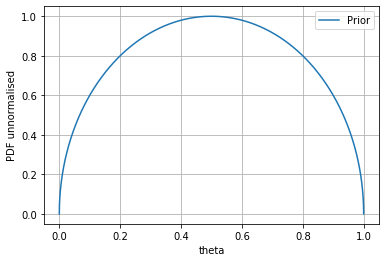

In [423]:
nsteps=10000
x = np.linspace(0,1,nsteps)
#prior is a beta function
prior=x**(a-1)*((1-x)**(b-1))/0.5
#beta=beta(a,b) #cant use beta scipy as it goes over 1 to 1.2
plt.plot(x,prior,label='Prior')
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.grid()
plt.legend(loc='best')

Once the prior is calculated, the likelihood is calculated.<br>
Through taking a generated array of 10000 steps, similar to how the prior was plotted. The likelihood function can be plotted.<br>
This is done by using the equation:<br>

$likelihood=\frac{N!}{(\nu)(N-\nu)!}(x^{\nu})(1-x)^{(N-\nu)}$<br>

#### Where 

$\nu , N$ are defined above<br>
$x$ is the linspace of values, in this case an array between 0 and 1 with 10000 steps.<br>



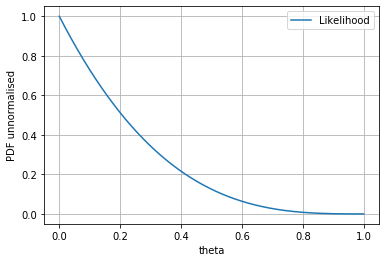

In [424]:
nsteps=10000
x = np.linspace(0,1,nsteps)
likelihood = (math.factorial(N)/(math.factorial(nu)*(math.factorial(N-nu))))*x**nu * (1 - x)**(N - nu) 
plt.plot(x,likelihood,label='Likelihood')
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.grid()
plt.legend(loc='best')

With the values of $a$ and $b$ from the prior, the posterior values of $a$ and $b$ can be calculated using the eqautions:<br>

$post a = nu + a$<br>

$post b = N - nu + b$<br>

from this, the Posterior mean, variance and standard deviation can be calculated using the equations bellow:<br>

$\hat{\theta}_{B_{Posterior}}=\frac{a}{a+b}$<br>
$\sigma_{B_{Posterior}}^2 = \frac{\hat{\theta}(1-\hat{\theta})}{a+b+1}$<br>

$\hat{\theta}_{B_{Posterior}}$ is the mean of the posterior<br>

$\sigma_{B_{Posterior}}^2$ is the variance of the posterior<br>

To get the posterior's standard deviation, the square root of the variance can be taken.<br>

Furthermore, the Posterior plot is found through the multiplication of the prior plot and the likelihood plot.<br>

Posterior a= 1.5 Posterior b= 4.5
The Posterior mean is 0.167.
The Posterior variance is 0.020.
The Posterior standard deviation is 0.141.


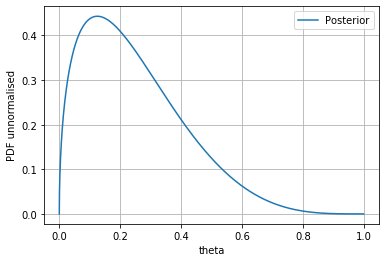

In [425]:
#Posterior mean
#post_a=nu+a
post_a=nu+a
#post_b=N-nu+b
post_b=N-nu+b
print('Posterior a=',post_a,'Posterior b=',post_b)
Posterior_mean=((nu+post_a))/((N+post_a+post_b))
print(f'The Posterior mean is {Posterior_mean:.3f}.')
Posterior_var=(Posterior_mean*(1-Posterior_mean))/(post_a+post_b+1)
print(f'The Posterior variance is {Posterior_var:.3f}.')
Posterior_std=Posterior_var**.5
print(f'The Posterior standard deviation is {Posterior_std:.3f}.')
posterior = likelihood*prior
plt.plot(x,posterior,label='Posterior')
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.grid()
plt.legend(loc='best')

### Plotting the Prior, Likelihood and Posterior on the same graph.

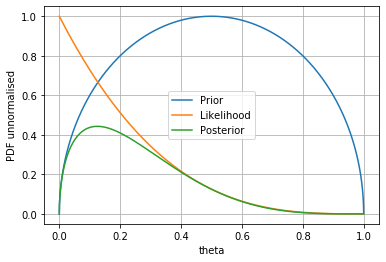

In [426]:
plt.plot(x,prior,label='Prior')
plt.plot(x,likelihood,label='Likelihood')
plt.plot(x,posterior,label='Posterior')
plt.grid()
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.legend(loc='best')

To calculate where 95% credible test to see where 95% of the data lies to perform a Null Hypothesis Test for the posterior.
This is done by using the the beta package from scipy. By using 'beta.interval', this allows for a plot to segment the Posterior to cover 95% of the data set. 

As the data is non-uniform, this is done using the 'beta.interval'. If the data was uniform, then a HDI could have been calculated as follows using a statistical fact that $1.96\sigma$ is the credible interval for 95% of the data.<br>
How it would have been coded<br>
HDI_a = posterior_mean+1.96*posterior_std<br>
HDI_b = posterior_mean-1.96*posterior_std<br>
But as the data is non-uniform, then it cannot be performed.  

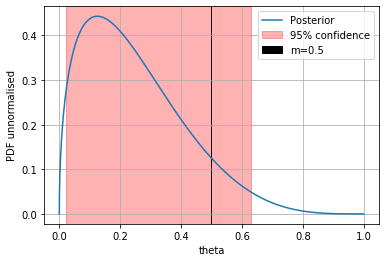

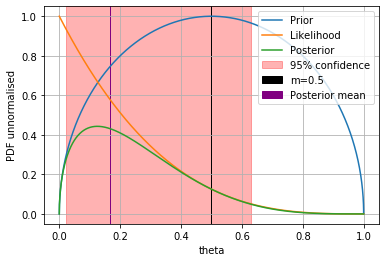

In [427]:
plt.figure(1)
plt.plot(x,posterior,label='Posterior')
plt.grid()
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.legend(loc='best')
z=beta.interval(0.95, post_a, post_b, loc=0, scale=1)
plt.axvspan(z[0],z[1],color='red',label='95% confidence',alpha=0.3)
plt.axvspan(0.5,0.5,color='black',label='m=0.5',alpha=1)
plt.legend(loc='best')
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.figure(2)
plt.plot(x,prior,label='Prior')
plt.plot(x,likelihood,label='Likelihood')
plt.axvspan(z[0],z[1],color='red',label='95% confidence',alpha=0.3)
plt.axvspan(0.5,0.5,color='black',label='m=0.5',alpha=1)
plt.axvspan(0.167,0.168,color='purple',label='Posterior mean',alpha=1)
plt.plot(x,posterior,label='Posterior')
plt.grid()
plt.xlabel('theta')
plt.ylabel('PDF unnormalised')
plt.legend(loc='upper right')

###### Null Hypothesis- 




The Null Hypothesis for the data is that the multiplicity value is 0.5 for all data star formations.<br>
The vales within the 95% criteria are between 0.02 and 0.63.<br>
By drawing a line at the multiplicity value of 0.5 it can be shown that it lies within a significance of 95% as it is between 0.02 and 0.63, therefore the null Hypothesis cannot be rejected.



It must be stated that only 3 simulations have been run. More simulations should be run to gather more information about the prior to perform the tests on to get a new result. There may be a variation in the results, and might lead to a different conclusion. 

##### What has happened to the mean and standard devition?

|Types|Prior|Posterior|
|------|------|-------|
|Mean   |0.500|0.167|
|Standard deviation|0.250|0.141|
|Variance   |0.062|0.020|

From the table above, it can be shown that the mean,standard deviation and variance have all decreased from the prior to posterior. This suggests that the posterior values are more accurate due to their smaller standard deviations and variance. 

Interestingly, both the prior and posteriors mean values lie within the credible range. This suggests although the test returns 0 multiplicities, the results are still valid.

***
## QUESTION 2
***

Professor Dumbledore, studying the extinction of the elephant bird, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dayed and found to have the following dumbledore_ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years. 

What is the mean and standard deviation of the age of elephant bird eggs based on this information?

**Tip a** Write down an analytical expression for the mean and standard deviation of the age of the new eggs for the posterior distribution that takes into account both Professor Dumbeldore's new data and the previous age estimate from Professor Snape (all the equations are given in the notes).

**Tip b**: Write an MCMC algorithm from scratch and use it to create a posterior distribution for the mean age of the eggs.  Discuss your results.

[75 marks]

#### Answer:

From the lecture notes:<br>
$\hat{\theta} = \dfrac{\sigma_0^2}{\sigma_0^2 + \frac{\sigma^2}{n}}\hat{X}~+~\dfrac{\frac{\sigma^2}{n}}{\sigma_0^2 + \frac{\sigma^2}{n}}\mu_0$
<br><br>
$\hat{\sigma}^2 = \dfrac{\frac{\sigma_{0}^{2}\sigma^{2}}{n}}{\sigma_{0}^{2} + \frac{\sigma^{2}}{n}}$
###### Where:
$\hat\theta =$ the expected mean of the posterior<br>
$\hat\sigma^2 =$ the expected variance of the posterior<br>
$\sigma_0^2 =$ the variance of the previous eggs data<br>
$\mu_0 =$ the mean of the previous eggs data<br>
$\sigma^2 = $ the variance of the new eggs<br>
$\hat{X} =$ the mean of the new eggs data<br>
$n = $ the number of data points<br>

To start, the initial parameters of given in the question are defined.<br>
Snapes data will be treated as the Prior.<br>

The ammount of **MCMC** runs are defined, with the originial start of the runs beine defined in the function 'theta'.<br>
To generate these start points, a random number between 1000 and 2500 is selected. These numbers are chosen as they are both close to the extremities of the data collected by dumbledore. It was carefully chosen as being too small the mcmc chain will explore parameter space very slowly.However as, $\frac{P(\theta_{proposed})}{P(\theta_{current}}$ is roughly 1, it will be very accurate.<br> 
If too big it $\frac{P(\theta_{proposed})}{P(\theta_{current}}$ will be too small and the chance of accepting a proposed move will be small.<br>
These are parameters that have been taken into consideration.

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 #Snapes Mean
snape_std = 300 #Snapes Standard deviation
runs = 5 #Runs to compare different starting points 
total_steps = 10000 #Number of steps
step_width = 20 #Width between each step

def theta(data):
    theta_initial = np.random.randint(500,2500) # define suitable starting positions
    return theta_initial

The second function, *posterior* taks a value of theta and returns the posterior probability for that given theta value. 
This is done using scipy stats, using the inbuiltnormal distribution function.
This gives a normal distribution for the likelihood and prior which can be multiplied together to get the posterior.


In [429]:
def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior

Bellow is the function for the MCMC, it returns values of theta in a given ammount N steps.


How the MCMC works: 

1) An intial guess $\theta_{current}$ <br>This is done by generating a random number between 500-2500<br>

2) propose a random step $\theta_{proposed}=\theta_{current}+ \Delta_{\theta}$<br>
This is done by a normal distribution<br>

3) the comparrison of $\theta_{current}$ and $\theta_{proposed}$<br> 

if the probability of theta proposed is greater than theta current, the new proposed is taken and that point is moved onto.<br>

$P(\theta_{proposed}) > P(\theta_{current})$<br>

if theta proposed is smaller than current, then the probability of a move changes to be:<br>

$P_{move}=min(\frac{P(\theta_{proposed})}{P(\theta_{current}},1)$

4) if $P_{move}$ is $<$ 1, then a random number must be generated betweeen 0 and 1. If this random number is smaller or equal to $P_{move}$ then the proposed move is taken, if not, then no move shall occur at this instance.

5) So now a value for $\theta_{current}$ is either accepted as a new value or rejected and kept the same. The process is restarted for this new value or for the same value. It seems counter intuitive to restart the chain with the same $\theta_{current}$ value, but it will get to step 4) and may change.

In [430]:
def mcmc(N, step_width, snape_mean, snape_std, prev_data, prev_std):
    #This returns the values for theta with in a determined steps N of certain step width

    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")# the random guess calculated in the theta function
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width) # Pick step size from normal distribution with step_width
        theta_prop = theta_current + delta_theta #adding the change to theta

        # Calculate probabilities of the current and proposed theta
        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

        # This chooses the probability of moving based on thetas.
        prob_move = min((prob_prop_theta/prob_current), 1)
        #if the probability of proposed theta is greater than the probability of current theta,
        #then the prob_move will return as 1.
    
        if np.random.rand() < prob_move:
        #generate a random number, if its less than the probability of moving
        #then set theta current to the new theta proposed.
            theta_current = theta_prop
        thetas[step] = theta_current  
        
    return thetas
#store the new values for theta.

This function bellow gets the mean and standard deviation of the data set.

In [431]:
def mean_and_std(data, total_mean, total_std):
    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

This sets the variables for the loop

In [432]:
# Setting up variables
MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


The MCMC loop, this runs the mcmc function stated above for a random initial guess for N ammount of runs, the mean and standard deviation is found for each run.<br>
The values for each run is averaged to get an overall mean and std.

In [433]:
# Running a loop of MCMC for each run, run has been set to 5 so returns the 5 random runds
for run in range(runs):
    print(f"Starting run {run+1}")
    #This places all of the data into the mcmc function and runs it in a loop
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width=step_width,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    # Collecting data
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    
    # Print the results for each run
    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')

# Print the averages for the mean and standard deviation for each result.
overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

Starting run 1
Intial guess: 1728yrs
Mean for run 1: 1356yrs
Standard dev for run 1: 229yrs
Run complete
Starting run 2
Intial guess: 2360yrs
Mean for run 2: 1305yrs
Standard dev for run 2: 254yrs
Run complete
Starting run 3
Intial guess: 1304yrs
Mean for run 3: 1292yrs
Standard dev for run 3: 257yrs
Run complete
Starting run 4
Intial guess: 2005yrs
Mean for run 4: 1204yrs
Standard dev for run 4: 247yrs
Run complete
Starting run 5
Intial guess: 1720yrs
Mean for run 5: 1371yrs
Standard dev for run 5: 206yrs
Run complete
Overall mean: 1305yrs
Overall standard dev: 239yrs


This section plots the MCMC chain as well as a Histogram for the data to see another way of the convergence about the mean.

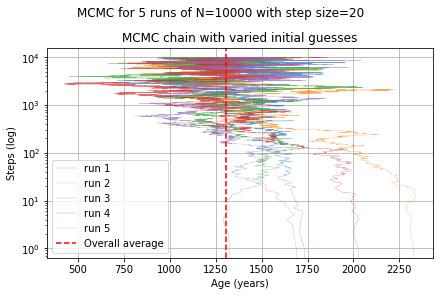

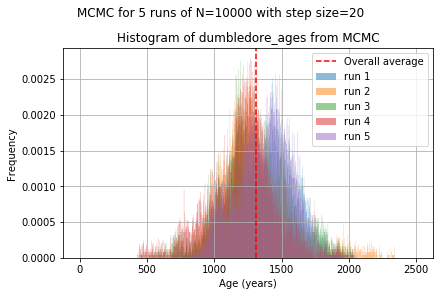

In [434]:
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])

# Plotting line and histogram for each run
for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")
# Formatting line plot ()
ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")
# Formatting histogram
ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")

# Main figure
fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width}")
plt.show()


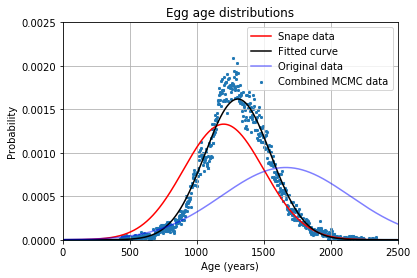

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1305.5
STD:246.5



In [435]:
from scipy.stats import norm
from scipy.optimize import curve_fit

# Data preparation
all_freq = np.sum(freq, axis=0)/runs  # Averaging MCMC freq data
x = np.linspace(0, 2500, 10000)  # To plot distributions data against
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  # Getting mean and standard deviation of MCMC data
orig_mean, orig_std = norm.fit(dumbledore_ages)  # Getting distributiuon purely from given initial data

# Plotting
plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")

# Plot formatting
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

# Printing fitting factors
print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

In [436]:
#Data deviation
Snape_Mcmc_mean=round((abs(snape_mean-all_mean)),2)
Dumbledore_Mcmc_mean=round((abs(orig_mean-all_mean)),2)
print('The MCMC mean is',Snape_Mcmc_mean,'far away from Snapes mean and',Dumbledore_Mcmc_mean,'far away from Dumbledores mean.')

The MCMC mean is 105.47 far away from Snapes mean and 357.63 far away from Dumbledores mean.


# The bellow section focuses on changing the step width and the affects that that has on the data sets, widths chosen are 5,10,50,200,400.

Starting run 1
Intial guess: 1460yrs
Mean for run 1: 1215yrs
Standard dev for run 1: 179yrs
Run complete
Starting run 2
Intial guess: 1289yrs
Mean for run 2: 1298yrs
Standard dev for run 2: 157yrs
Run complete
Starting run 3
Intial guess: 1196yrs
Mean for run 3: 950yrs
Standard dev for run 3: 155yrs
Run complete
Starting run 4
Intial guess: 2143yrs
Mean for run 4: 1805yrs
Standard dev for run 4: 242yrs
Run complete
Starting run 5
Intial guess: 1992yrs
Mean for run 5: 1649yrs
Standard dev for run 5: 220yrs
Run complete
Overall mean: 1383yrs
Overall standard dev: 191yrs


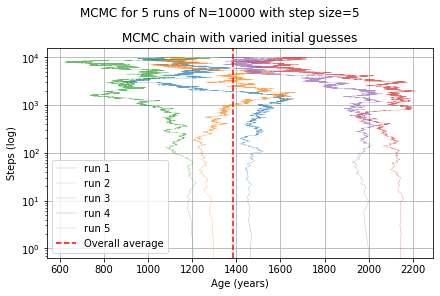

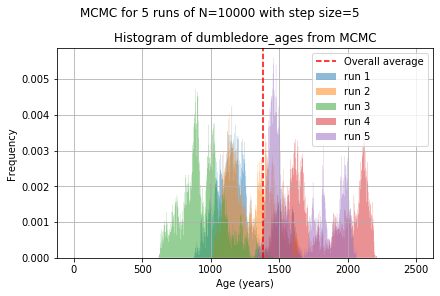

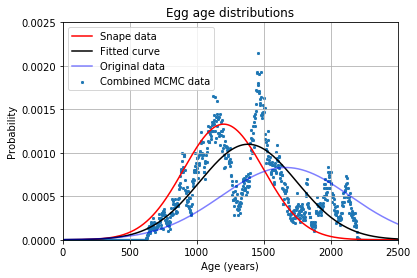

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1383.2
STD:363.1



In [312]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 #Snapes Mean
snape_std = 300 #Snapes Standard deviation
runs = 5 #Runs to compare different starting points 
total_steps = 10000 #Number of steps
step_width_new = 5 #Width between each step

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new)  
        theta_prop = theta_current + delta_theta

       
        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1)
        if np.random.rand() < prob_move:  
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

# Setting up variables
MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0

# Running MCMC in a loop
for run in range(runs):
    print(f"Starting run {run+1}")
    # Main MCMC call
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    # Collecting data
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    
    # Printing iteration results
    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')

overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")
ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")
ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")

fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()
from scipy.stats import norm
from scipy.optimize import curve_fit

all_freq = np.sum(freq, axis=0)/runs 
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")

plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()


print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

### Analysis of step width 5

#### The code takes the same method depicted above, but varies only the step width. This is mentionedon line 6.
Step width 5 was chosen to illustrate what happens to the MCMC's convergence at a small step width. As illustrated with the MCMC graph the MCMC shows a minimal convergence, the overall average mean of 1383 is still fairly consistent with the above mean for step width 20, it being 1345. However, it would not be clear noticing that by just looking at the graph.<br>
More noteable is the histogram plot for the data, the individual curves show minimal overlap and have a large spread across the ages.This is not consistent with the plot for step width 20. So through decreasing the step width, the variation in ages increases.<br>
Furthermore, the probability distribution for the data set at this level shows a high variation, with two notable peaks areoun 1200 years and 1550 years. this is not consistent with step width 20 as step width 20 shows a high probability at around 1350. 
So decreasing the step width has had an affect on the probability distribution. 

Starting run 1
Intial guess: 1096yrs
Mean for run 1: 1304yrs
Standard dev for run 1: 239yrs
Run complete
Starting run 2
Intial guess: 868yrs
Mean for run 2: 1365yrs
Standard dev for run 2: 246yrs
Run complete
Starting run 3
Intial guess: 1256yrs
Mean for run 3: 1175yrs
Standard dev for run 3: 198yrs
Run complete
Starting run 4
Intial guess: 2334yrs
Mean for run 4: 1628yrs
Standard dev for run 4: 198yrs
Run complete
Starting run 5
Intial guess: 1812yrs
Mean for run 5: 1504yrs
Standard dev for run 5: 249yrs
Run complete
Overall mean: 1395yrs
Overall standard dev: 226yrs


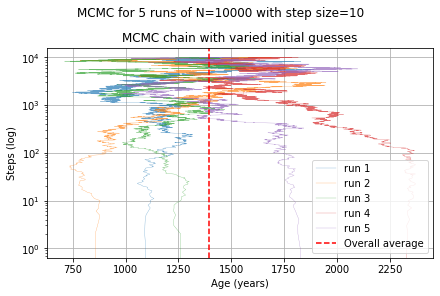

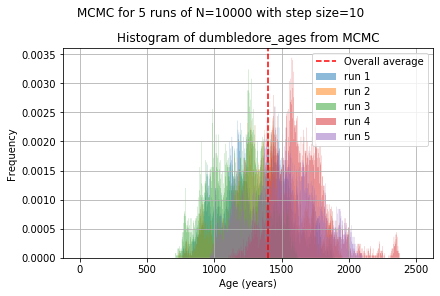

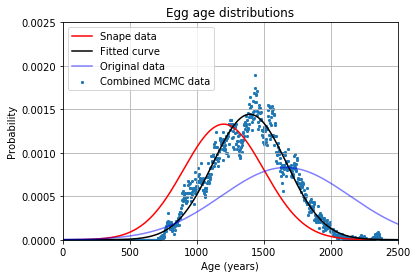

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1394.9
STD:276.4



In [313]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5  
total_steps = 10000 
step_width_new = 10 

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
 
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new) 
        theta_prop = theta_current + delta_theta


        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1) 
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std


MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


for run in range(runs):
    print(f"Starting run {run+1}")
    
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    

    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')


overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")

ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")

ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")


fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit


all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")


plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

### Analysis of step width 10

By setting step width to 10, there appears to be more convergence by visually looking at the MCMC, and the mean for this value has increased to 1394, it was expected that it would decrease from 1383 given from the step width 5 to be inbetween the meas for step width 5 and 20.<br>
The Histogram shows a tighther relationbetween the intial guesses. This suggests that increasing the step width will give a more concentrated mean.<br>
From the probability curve, there is a tighter relation between the MCMC, posterior and prior. 

Starting run 1
Intial guess: 1541yrs
Mean for run 1: 1305yrs
Standard dev for run 1: 242yrs
Run complete
Starting run 2
Intial guess: 1577yrs
Mean for run 2: 1318yrs
Standard dev for run 2: 270yrs
Run complete
Starting run 3
Intial guess: 1640yrs
Mean for run 3: 1315yrs
Standard dev for run 3: 234yrs
Run complete
Starting run 4
Intial guess: 2083yrs
Mean for run 4: 1346yrs
Standard dev for run 4: 259yrs
Run complete
Starting run 5
Intial guess: 2411yrs
Mean for run 5: 1295yrs
Standard dev for run 5: 244yrs
Run complete
Overall mean: 1316yrs
Overall standard dev: 250yrs


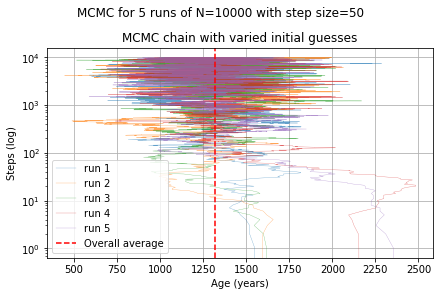

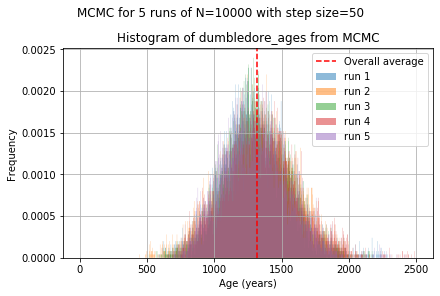

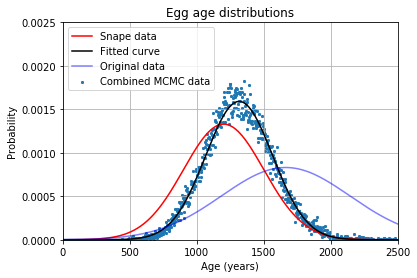

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1315.9
STD:250.7



In [314]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 #Snapes Mean
snape_std = 300 #Snapes Standard deviation
runs = 5 #Runs to compare different starting points 
total_steps = 10000 #Number of steps
step_width_new = 50 #Width between each step

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):

    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new)  
        theta_prop = theta_current + delta_theta

        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

        prob_move = min((prob_prop_theta/prob_current), 1)  
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0

for run in range(runs):
    print(f"Starting run {run+1}")
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    
    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')

overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])

for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")
ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")
ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")

fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()

all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  


plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")

plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Starting run 1
Intial guess: 1133yrs
Mean for run 1: 1314yrs
Standard dev for run 1: 254yrs
Run complete
Starting run 2
Intial guess: 1073yrs
Mean for run 2: 1327yrs
Standard dev for run 2: 249yrs
Run complete
Starting run 3
Intial guess: 1578yrs
Mean for run 3: 1332yrs
Standard dev for run 3: 258yrs
Run complete
Starting run 4
Intial guess: 818yrs
Mean for run 4: 1334yrs
Standard dev for run 4: 251yrs
Run complete
Starting run 5
Intial guess: 597yrs
Mean for run 5: 1338yrs
Standard dev for run 5: 253yrs
Run complete
Overall mean: 1329yrs
Overall standard dev: 253yrs


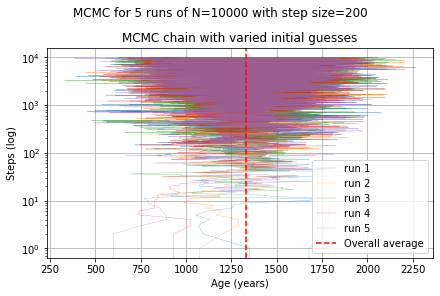

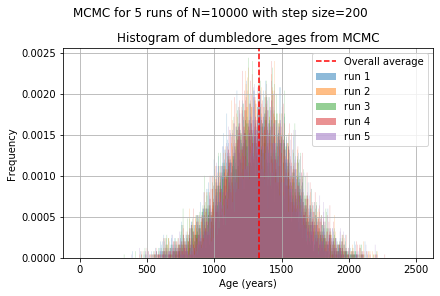

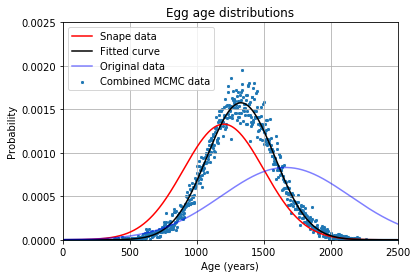

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1328.8
STD:253.3



In [339]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5 
total_steps = 10000 
step_width_new = 200
def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
    
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new)  
        theta_prop = theta_current + delta_theta

       
        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

        
        prob_move = min((prob_prop_theta/prob_current), 1)  
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0
run_mean=np.array([])


for run in range(runs):
    print(f"Starting run {run+1}")
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    
    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')

overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])

for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")
ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")
ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")

fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit

# Data preparation
all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")

plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Starting run 1
Intial guess: 1665yrs
Mean for run 1: 1328yrs
Standard dev for run 1: 253yrs
Run complete
Starting run 2
Intial guess: 649yrs
Mean for run 2: 1332yrs
Standard dev for run 2: 252yrs
Run complete
Starting run 3
Intial guess: 2279yrs
Mean for run 3: 1326yrs
Standard dev for run 3: 257yrs
Run complete
Starting run 4
Intial guess: 2174yrs
Mean for run 4: 1322yrs
Standard dev for run 4: 247yrs
Run complete
Starting run 5
Intial guess: 1916yrs
Mean for run 5: 1325yrs
Standard dev for run 5: 259yrs
Run complete
Overall mean: 1327yrs
Overall standard dev: 254yrs


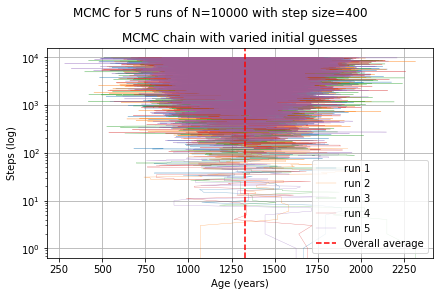

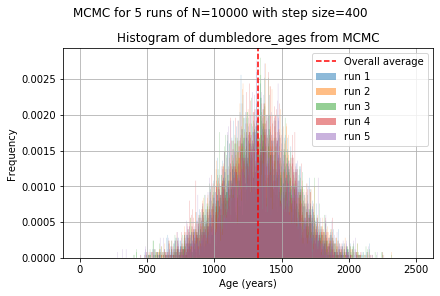

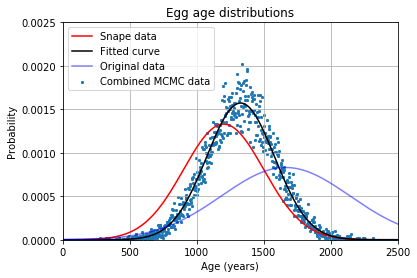

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1326.6
STD:253.7



In [361]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5 
total_steps = 10000 
step_width_new = 400 

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
   
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new)  
        theta_prop = theta_current + delta_theta

        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

        prob_move = min((prob_prop_theta/prob_current), 1)  
        if np.random.rand() < prob_move: 
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0
run_mean=np.array([])


for run in range(runs):
    print(f"Starting run {run+1}")
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    
    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')

overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])

for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")
ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")
ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")

fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit

all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages) 
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")

plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Text(0, 0.5, 'standard deviation')

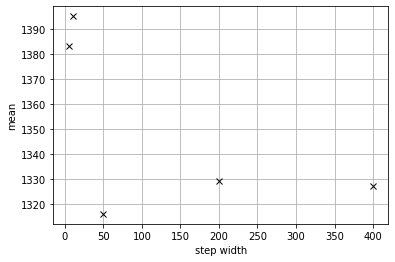

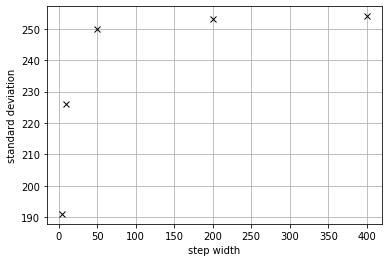

In [369]:
#Mean and standard deviation variance
step_width=np.array([5,10,50,200,400])
mean_stepwidth=np.array([1383,1395,1316,1329,1327])
std_stepwidth=np.array([191,226,250,253,254])
plt.figure(1)
plt.plot(step_width,mean_stepwidth,'kx')
plt.grid()
plt.xlabel('step width')
plt.ylabel('mean')
plt.figure(2)
plt.plot(step_width,std_stepwidth,'kx')
plt.grid()
plt.xlabel('step width')
plt.ylabel('standard deviation')

##### The above plots show the affect of varying the step size has on the mean and standard deviation of the posterior.<br>
|Step Width|Mean|Standard Deviation|
|--------- |----|------------------|
|5         |1383|191               |
|10        |1395|226               |
|50        |1316|250               |
|200       |1329|253               |
|400       |1327|254               |


The mean appears to show no obvious trend in increasing the step size. A small step size of 5 offers a mean value of 1383 years, increasing this stepsize to 10 increases the mean to 1395. However, increasing the step size to 50 decreases the mean value to 1316.<br>
At step size 200 and 400, there offers little variation between the mean values. It can be assumed that for larger step size values, the mean of the data should be between 1320 and 1330 from the data above. It is expected that increasing the step size, to say, 1000 would return a value significantly close to that of 200 and 400.<br>

With regards to the affect step size has on standard deviation, increasing the step size appears to follow a shape similar to a natural lograthmic graph. Increasing the step size causes an increase in standard deviation up untill a limit ~255, from this onwards it plateaus at this value of 255. Interestingly, the smaller the step width leads to a smaller standard deviation within the data set. This should be noted.
Through plotting a Ln graph, it could potentially be used to extrapolate the standard deviation for increased step widths. However, due to lack of time this is not shown in this script.


#### Increasing the step width

Overall it shall be noted from my results that increasing the step width has-<br>
1) Created a more accurate representation for the overal mean value from the intitial guess, settling on an age of around 1350 years<br>
2) Resulted in a more bell shaped, Gaussian shaped, histogram that centres more accurately on the mean value. Less values are occupied at smaller frequencies at more extreme ages, such as <1000 years and >1700 years.<br>
3) Increased the probability distribution to a more confident level.<br>


### The bellow code shows the importance fo step size. 
##### The tests are performed with step width 20 and 5 runs

Starting run 1
Intial guess: 1113yrs
Mean for run 1: 1357yrs
Standard dev for run 1: 98yrs
Run complete
Starting run 2
Intial guess: 665yrs
Mean for run 2: 666yrs
Standard dev for run 2: 37yrs
Run complete
Starting run 3
Intial guess: 533yrs
Mean for run 3: 611yrs
Standard dev for run 3: 45yrs
Run complete
Starting run 4
Intial guess: 1246yrs
Mean for run 4: 1265yrs
Standard dev for run 4: 45yrs
Run complete
Starting run 5
Intial guess: 1821yrs
Mean for run 5: 1633yrs
Standard dev for run 5: 103yrs
Run complete
Overall mean: 1106yrs
Overall standard dev: 65yrs


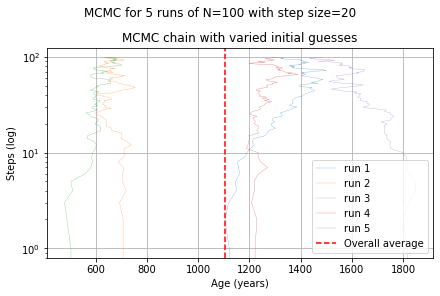

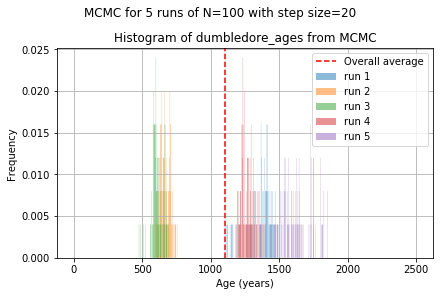

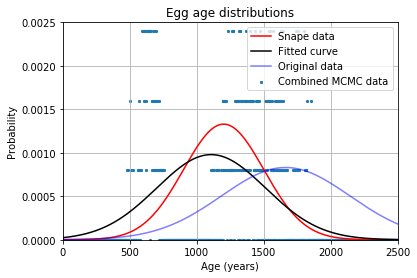

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1106.5
STD:407.3



In [441]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5  
total_steps = 100
step_width_new = 20

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
 
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new) 
        theta_prop = theta_current + delta_theta


        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1) 
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std


MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


for run in range(runs):
    print(f"Starting run {run+1}")
    
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    

    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')


overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")

ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")

ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")


fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit


all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")


plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Starting run 1
Intial guess: 705yrs
Mean for run 1: 1135yrs
Standard dev for run 1: 95yrs
Run complete
Starting run 2
Intial guess: 671yrs
Mean for run 2: 1126yrs
Standard dev for run 2: 253yrs
Run complete
Starting run 3
Intial guess: 1485yrs
Mean for run 3: 1637yrs
Standard dev for run 3: 126yrs
Run complete
Starting run 4
Intial guess: 2440yrs
Mean for run 4: 1968yrs
Standard dev for run 4: 291yrs
Run complete
Starting run 5
Intial guess: 2183yrs
Mean for run 5: 1745yrs
Standard dev for run 5: 242yrs
Run complete
Overall mean: 1522yrs
Overall standard dev: 201yrs


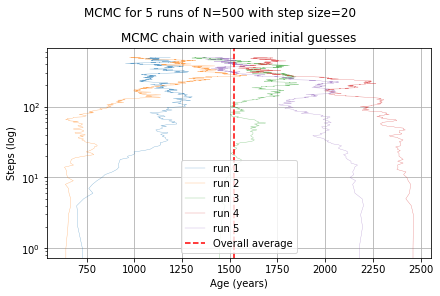

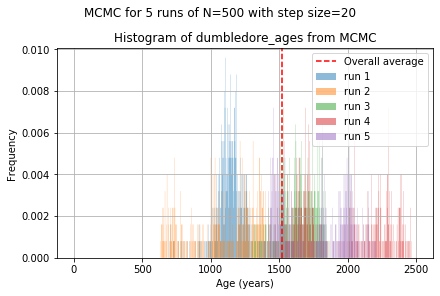

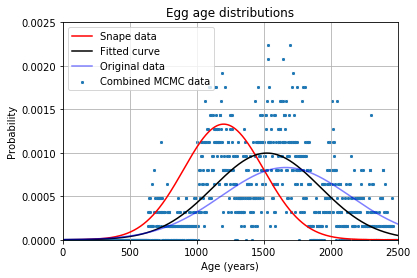

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1522.2
STD:400.2



In [444]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5  
total_steps = 500 
step_width_new = 20 

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
 
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new) 
        theta_prop = theta_current + delta_theta


        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1) 
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std


MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


for run in range(runs):
    print(f"Starting run {run+1}")
    
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    

    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')


overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")

ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")

ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")


fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit


all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")


plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Starting run 1
Intial guess: 1235yrs
Mean for run 1: 1030yrs
Standard dev for run 1: 148yrs
Run complete
Starting run 2
Intial guess: 836yrs
Mean for run 2: 1398yrs
Standard dev for run 2: 304yrs
Run complete
Starting run 3
Intial guess: 515yrs
Mean for run 3: 802yrs
Standard dev for run 3: 196yrs
Run complete
Starting run 4
Intial guess: 1061yrs
Mean for run 4: 1311yrs
Standard dev for run 4: 140yrs
Run complete
Starting run 5
Intial guess: 1919yrs
Mean for run 5: 1804yrs
Standard dev for run 5: 116yrs
Run complete
Overall mean: 1269yrs
Overall standard dev: 181yrs


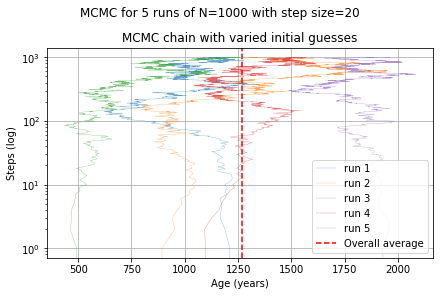

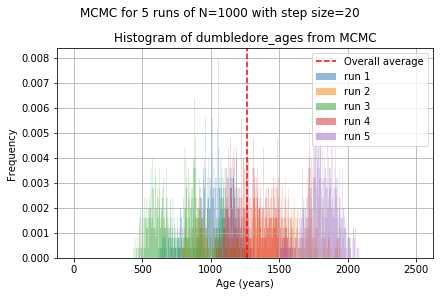

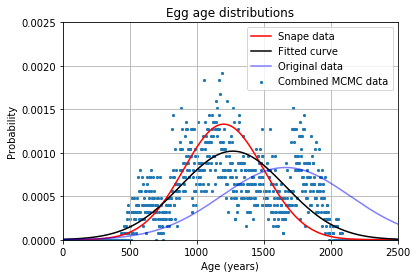

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1268.7
STD:391.3



In [445]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5  
total_steps = 1000
step_width_new = 20 

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
 
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new) 
        theta_prop = theta_current + delta_theta


        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1) 
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std


MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


for run in range(runs):
    print(f"Starting run {run+1}")
    
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    

    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')


overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")

ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")

ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")


fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit


all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")


plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Starting run 1
Intial guess: 2050yrs
Mean for run 1: 1309yrs
Standard dev for run 1: 266yrs
Run complete
Starting run 2
Intial guess: 1265yrs
Mean for run 2: 1311yrs
Standard dev for run 2: 270yrs
Run complete
Starting run 3
Intial guess: 889yrs
Mean for run 3: 1358yrs
Standard dev for run 3: 269yrs
Run complete
Starting run 4
Intial guess: 556yrs
Mean for run 4: 1351yrs
Standard dev for run 4: 248yrs
Run complete
Starting run 5
Intial guess: 555yrs
Mean for run 5: 1350yrs
Standard dev for run 5: 267yrs
Run complete
Overall mean: 1336yrs
Overall standard dev: 264yrs


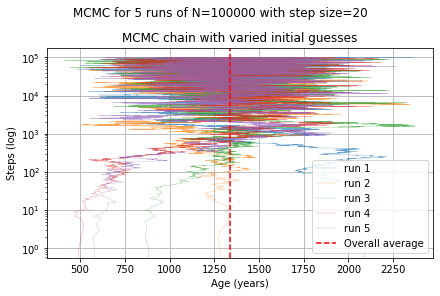

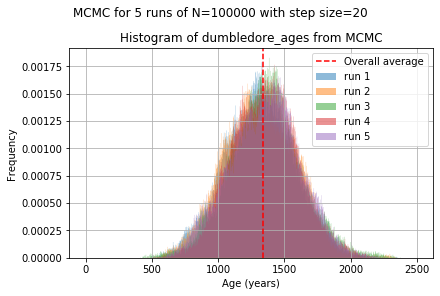

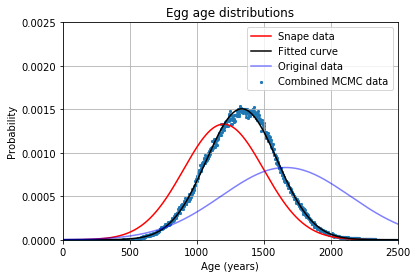

Original data:
Mean:1663.1
STD:479.9

Snape:
Mean:1200.0
STD:300.0

Fitted MCMC:
Mean:1335.6
STD:265.0



In [446]:
dumbledore_ages=np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])# Dumbledores data
snape_mean = 1200 
snape_std = 300 
runs = 5  
total_steps = 100000 
step_width_new = 20 

def posterior(theta, snape_mean, snape_std, dumbledore_ages, prev_std):
    prev_std = np.std(dumbledore_ages)
    prev_mean = np.mean(dumbledore_ages)
    likelihood = norm.pdf(theta, prev_mean, prev_std)
    prior = norm.pdf(theta, snape_mean, snape_std)
    return likelihood * prior
def mcmc(N, step_width_new, snape_mean, snape_std, prev_data, prev_std):
 
    thetas = np.zeros(N)
    theta_current = theta(prev_data)
    print(f"Intial guess: {theta_current}yrs")
    
    for step in range(N):
        delta_theta = np.random.normal(0, step_width_new) 
        theta_prop = theta_current + delta_theta


        prob_current = posterior(theta_current, snape_mean, snape_std, prev_data, prev_std=prev_std)
        prob_prop_theta = posterior(theta_prop, snape_mean, snape_std, prev_data, prev_std=prev_std)

       
        prob_move = min((prob_prop_theta/prob_current), 1) 
        if np.random.rand() < prob_move:  
            theta_current = theta_prop
        thetas[step] = theta_current  
    return thetas

def mean_and_std(data, total_mean, total_std):

    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std


MCMC_dumbledore_ages = np.zeros([runs, total_steps])
steps = np.array(range(total_steps))
total_mean = 0
total_std = 0


for run in range(runs):
    print(f"Starting run {run+1}")
    
    MCMC_dumbledore_ages[run] = mcmc(total_steps, step_width_new=step_width_new,
                           snape_mean=snape_mean, snape_std=snape_std,
                           prev_data=dumbledore_ages, prev_std=np.std(dumbledore_ages))
    
    run_parameters = mean_and_std(MCMC_dumbledore_ages[run], total_mean, total_std)
    run_mean, run_std, total_mean, total_std = run_parameters

    

    print(f"Mean for run {run+1}: {run_mean:.0f}yrs")
    print(f"Standard dev for run {run+1}: {run_std:.0f}yrs")
    print('Run complete')


overall_av = total_mean/runs
overall_std = total_std/runs
print(f"Overall mean: {overall_av:.0f}yrs")
print(f"Overall standard dev: {overall_std:.0f}yrs")

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig2, ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
bins = np.linspace(0, 2500, 1000)
freq = np.zeros([runs, len(bins)-1])


for run in range(runs):
    ax1.plot(MCMC_dumbledore_ages[run], steps,linewidth=0.3, alpha=0.7, label=f"run {run+1}")
    freq[run], _, _ = ax2.hist(MCMC_dumbledore_ages[run],bins=bins,alpha=0.5,density=True,histtype="stepfilled",label=f"run {run+1}")

ax1.grid()
ax1.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax1.set_yscale("log")
ax1.set_ylabel("Steps (log)")
ax1.set_xlabel("Age (years)")
ax1.set_title("MCMC chain with varied initial guesses")
ax1.legend(loc="best")

ax2.grid()
ax2.axvline(overall_av, linestyle="--", color="r", label="Overall average")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Age (years)")
ax2.set_title("Histogram of dumbledore_ages from MCMC")
ax2.legend(loc="best")


fig.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
fig2.suptitle(f"MCMC for {runs} runs of N={total_steps} with step size={step_width_new}")
plt.show()


from scipy.stats import norm
from scipy.optimize import curve_fit


all_freq = np.sum(freq, axis=0)/runs  
x = np.linspace(0, 2500, 10000)  
all_mean, all_std = norm.fit(MCMC_dumbledore_ages)  
orig_mean, orig_std = norm.fit(dumbledore_ages)  

plt.figure()
plt.scatter(bins[:-1], all_freq, marker="x", s=5, label="Combined MCMC data")
plt.plot(x, norm.pdf(x, snape_mean, snape_std), "r", label="Snape data")
plt.plot(x, norm.pdf(x, all_mean, all_std), "k", label="Fitted curve")
plt.plot(x, norm.pdf(x, orig_mean, orig_std), "b", alpha=0.5, label="Original data")


plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.title("Egg age distributions")
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 0.0025)
plt.legend(loc="best")
plt.show()

print(f"Original data:\nMean:{orig_mean:.1f}\nSTD:{orig_std:.1f}\n")
print(f"Snape:\nMean:{snape_mean:.1f}\nSTD:{snape_std:.1f}\n")
print(f"Fitted MCMC:\nMean:{all_mean:.1f}\nSTD:{all_std:.1f}\n")

Text(0, 0.5, 'standard deviation')

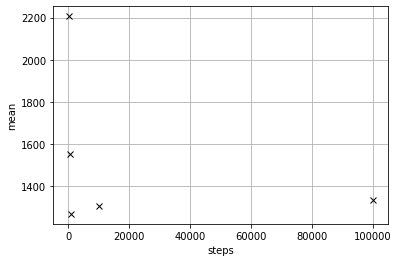

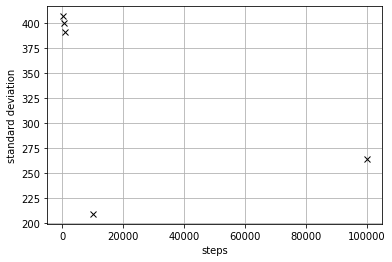

In [447]:
#Mean and standard deviation variance
step_s=np.array([100,500,1000,10000,100000])
mean_step=np.array([2206,1552,1269,1305,1336])
std_step=np.array([407,400,391.3,209,264])
plt.figure(1)
plt.plot(step_s,mean_step,'kx')
plt.grid()
plt.xlabel('steps')
plt.ylabel('mean')
plt.figure(2)
plt.plot(step_s,std_step,'kx')
plt.grid()
plt.xlabel('steps')
plt.ylabel('standard deviation')

|Step Size|Mean|Standard Deviation|
|---------|----|------------------|
|100      |2206|407               |
|500      |1552|400               |
|100      |1269|391               |
|10000    |1305|209               |
|100000   |1336|264               |

The affect that step size has on the data set is more obvious than step width, the small step sizes of 100,500 and 1000 shows small changes in their returns for standard deviation, however, their means vary quite drastically ranging from 2206 for 100 steps to 1269 for 1000 steps. Due to their larger standard deviations, it is not optimal to use them.<br>
10000 steps offered a very good estimation as it has a considerable smaller standard deviation, of 209 compared to its mean value of 1305. This is far better than the previous step sizes. <br>
100,000 offered a very tight fit on its probability distribution and its histograms, better than all of the others. However it has a higher standard deviation at 264. Furthermore, it is very time consuming to run 100,000 steps. Because of this, it is most viable to use a step size of 10,000. 

Overall, increasing the step size has brought the data's mcmc closer together for each intial guess. This is shown by the increase in convergence around a point for both the mcmc chains as well as for the mcmc histograms. The chains, histograms and probability graphs above are worse at the smaller step sizes of 100 and 500, arguably showing no convergence at all. The convergence increases over the increase of step size. In the future when working with mcmc using the largest viable step size should be considered.